## Evaluation Exercise - Regression Exercises

In [1]:
import math

import pandas as pd
import numpy as np
import seaborn as sns 
from pydataset import data 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_the_baseline

#### Question 1: Load the tips dataset from either pydataset or seaborn.



In [2]:
tips_df = data('tips')   ##loading the tips dataset into a dataframe using pydataset
tips_df.head()           ##displaying dataset

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


#### Question 2: Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.



In [3]:
model = LinearRegression().fit(tips_df[['total_bill']], tips_df.tip)
tips_df['yhat'] = model.predict(tips_df[['total_bill']])

In [4]:
tips_df['yhat_baseline'] = tips_df.tip.mean() 

In [5]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


#### Question 3: Plot the residuals for the linear regression model that you made.



In [6]:
tips_df['baseline_residuals'] = tips_df.tip - tips_df.yhat_baseline
tips_df['residuals'] = tips_df.tip - tips_df.yhat

In [7]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,baseline_residuals,residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.988279,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-1.338279,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.501721,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,0.311721,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.611721,0.107178


<AxesSubplot:ylabel='Frequency'>

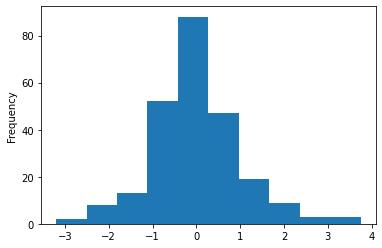

In [8]:
tips_df.residuals.plot.hist()

<AxesSubplot:ylabel='Frequency'>

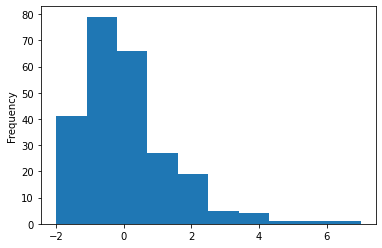

In [9]:
tips_df.baseline_residuals.plot.hist()

fig, ax = plt.subplots(figsize=(10,8))

ax.hist(tips_df.baseline_residuals, label='Baseline Residuals', alpha = .7)
ax.hist(tips_df.residuals, label='Model Residuals', alpha = .7)
ax.legend()

#### Question 4: Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [10]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,baseline_residuals,residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.988279,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-1.338279,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.501721,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,0.311721,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.611721,0.107178


#### Model Scoring and Evaluating

##### Calculating Sum of Squared Errors

In [11]:
sse = (tips_df.residuals ** 2).sum()
sse

252.788743850776

##### Calculating Mean Squared Errors

In [12]:
n = tips_df.shape[0]
mse = sse / n
mse

1.036019442011377

Calculating Root Mean Squared Errors

In [13]:
rmse = math.sqrt(mse)
rmse

1.0178504025697377

##### Calculating model ESS (Explained Sum of Squares) & TSS (Total Sum of Squares)

In [14]:
ess = ((tips_df.yhat - tips_df.tip.mean())**2).sum()
tss = ((tips_df.tip - tips_df.tip.mean())**2).sum()

print(f' Model ess: {ess} Model tss: {tss}')

 Model ess: 212.42373319840422 Model tss: 465.2124770491804


#### Question 5: Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).



#### Comparing Model to Baseline

In [15]:
sse_baseline = (tips_df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'Model scores --> sse: {sse} mse: {mse} rmse: {rmse}')
print(f'Baseline scores --> sse: {sse_baseline} mse: {mse_baseline} rmse: {rmse_baseline}')

Model scores --> sse: 252.788743850776 mse: 1.036019442011377 rmse: 1.0178504025697377
Baseline scores --> sse: 465.2124770491804 mse: 1.906608512496641 rmse: 1.3807999538298954


#### Question 6: Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [16]:
if sse < sse_baseline:
    print(f'The model sse out performs the baseline sse by {sse_baseline - sse} untis')
else:
    print(f'The model see under performs the baseline see by {sse - sse_baseline} units')

The model sse out performs the baseline sse by 212.4237331984044 untis


#### Question 7: What is the amount of variance explained in your model?



In [17]:
R_squared = ess/tss
print(f'The explained variance in my model is {R_squared}')

The explained variance in my model is 0.4566165863516761


#### Question 8: Is your model better than the baseline model?



##### Calculating ESS & TSS for baseline

In [18]:
ess_b = ((tips_df.yhat_baseline - tips_df.tip.mean())**2).sum()
tss_b = ((tips_df.tip - tips_df.tip.mean())**2).sum()

print(f'The baseline ess: {ess_b} and the baseline tss: {tss_b}')

The baseline ess: 0.0 and the baseline tss: 465.2124770491804


    - Given the calculated scores and visualizations created we can determine our model is better than the baseline. The model outperforms the baseline in every metric: SSE, MSE, & RMSE
    - Also looking at the histograms we can see the model predictions are more likely to miss in the -1 to 1 range than the baseline predictions which look like they are more likely to miss in the -2 to 2 range

#### Function Test

----------------Residuals Histogram---------------


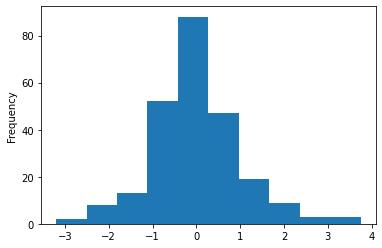

------------Baseline Residuals Histogram----------


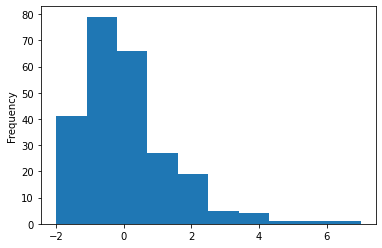

-----------------------------Comparison Histogram--------------------------


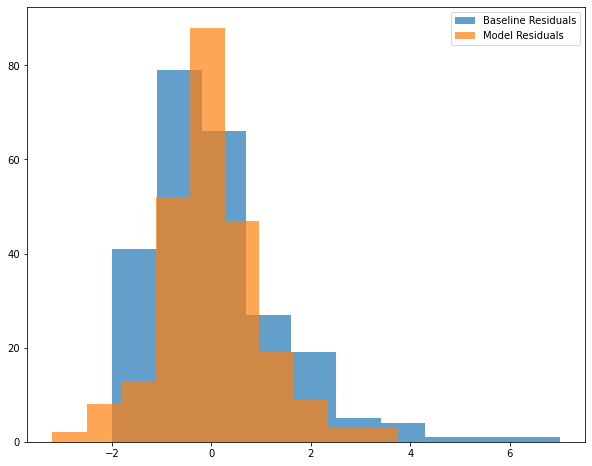

In [19]:
plot_residuals(tips_df, tips_df.tip, tips_df.yhat)

In [20]:
regression_errors(tips_df, tips_df.tip, tips_df.yhat)


    Regression Model Error
    
    | Metric                       | Model Value |
    |------------------------------|-------------|
    | Sum of Squared Errors     SSE| 252.78874   
    | Explained Sum of Squares  ESS| 212.42373   
    | Total Sum of Squares      TSS| 465.21248   
    | Mean Squared Error        MSE| 1.03602     
    | Root Mean Squared Error  RMSE| 1.01785     
    
    


In [21]:
baseline_mean_errors(tips_df)


    Regression Baseline Error
    
    | Metric                           | Baseline Value      |
    |----------------------------------|---------------------|
    | Sum Squared Errors            SSE| 465.21248  
    | Mean of Squared Errors        MSE| 1.90661  
    | Root Mean of Squared Errors  RSME| 1.38080 

    
    


In [22]:
better_than_the_baseline(tips_df)

True

#### Question 10: Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [23]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
model2 = LinearRegression().fit(mpg[['displ']], mpg.hwy)
mpg['yhat'] = model.predict(mpg[['displ']])

In [25]:
mpg['yhat_baseline'] = mpg.hwy.mean()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,yhat_baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1.109314,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1.109314,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,1.130319,23.440171
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1.130319,23.440171
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1.214338,23.440171


In [26]:
mpg['residuals'] = mpg.hwy - mpg.yhat
mpg['baseline_residuals'] = mpg.hwy - mpg.yhat_baseline
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,yhat_baseline,residuals,baseline_residuals
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1.109314,23.440171,27.890686,5.559829
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1.109314,23.440171,27.890686,5.559829
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,1.130319,23.440171,29.869681,7.559829
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1.130319,23.440171,28.869681,6.559829
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1.214338,23.440171,24.785662,2.559829


----------------Residuals Histogram---------------


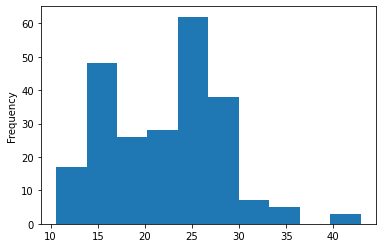

------------Baseline Residuals Histogram----------


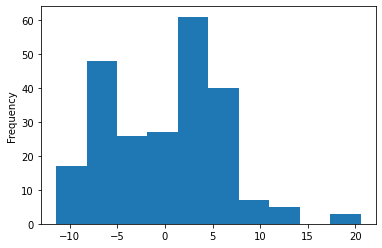

-----------------------------Comparison Histogram--------------------------


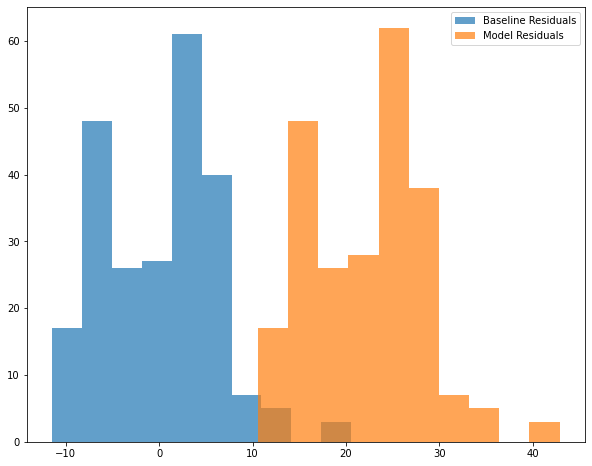

In [27]:
plot_residuals(mpg, mpg.hwy, mpg.yhat)

In [28]:
regression_errors(mpg, mpg.hwy, mpg.yhat)


    Regression Model Error
    
    | Metric                       | Model Value |
    |------------------------------|-------------|
    | Sum of Squared Errors     SSE| 123414.75111   
    | Explained Sum of Squares  ESS| 114864.67146   
    | Total Sum of Squares      TSS| 8261.66239   
    | Mean Squared Error        MSE| 527.41347     
    | Root Mean Squared Error  RMSE| 22.96548     
    
    


In [29]:
baseline_mean_errors(mpg)


    Regression Baseline Error
    
    | Metric                           | Baseline Value      |
    |----------------------------------|---------------------|
    | Sum Squared Errors            SSE| 8261.66239  
    | Mean of Squared Errors        MSE| 35.30625  
    | Root Mean of Squared Errors  RSME| 5.94191 

    
    


In [30]:
better_than_the_baseline(mpg)

False